In [29]:

import librosa
import vamp
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
import jams
man_path = '/Users/tom/Music/DataSet/test-set_man/eh_BN1-129-Eb_c_man.jams'
auto_path = '/Users/tom/Music/DataSet/test-set_mira_search2/0YFR/eh_BN1-129-Eb_c_hex_cln.jams'
auto = jams.load(auto_path)
man = jams.load(man_path)

In [33]:
f = '/Users/tom/Music/DataSet/test_set_annotated1/eh_BN1-129-Eb_c/03_G_ghex_mira_mode-1_preset-eh_BN1-129-Eb_c.wav'
y, FS = librosa.load(f, sr=44100)

param = {
            'threshdistr': 2,
            'outputunvoiced': 0,
            'precisetime': 0,
            'lowampsuppression': 0.005,
            'onsetsensitivity': 0.8
         }

output_notes = vamp.collect(y, FS, 'pyin:pyin', output='notes', parameters=param)
output_sal = vamp.collect(y, FS, 'pyin:pyin', 
                           output='candidatesalience', parameters=param)
output_prob = vamp.collect(y, FS, 'pyin:pyin', output='f0probs', 
                           parameters=param)
output_cand = vamp.collect(y, FS, 'pyin:pyin', output='f0candidates', 
                           parameters=param)
print(len(output_notes['list']))

34


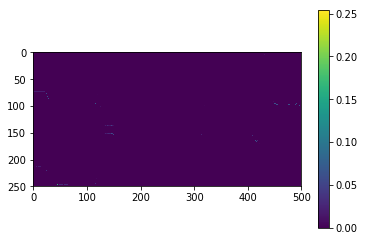

In [37]:
stepsize, sal_data = output_sal["matrix"]
my_plt = plt.imshow(sal_data[200:700].T[350:600])
plt.colorbar()

def hz_to_bin(hz):
    return (FS/hz)

In [38]:
def get_note_feature(note_audio, fs):
    avg_energy = np.dot(note_audio, note_audio) / len(note_audio)
    avg_spread = np.mean(
        librosa.feature.spectral_bandwidth(
            y=note_audio, sr=fs, S=None, n_fft=2048, hop_length=512, 
            freq=None, centroid=None, norm=True, p=2
        )
    )
    feature = [avg_energy, avg_spread]
    return feature

def is_note(st, et, ref_ann):
    # checks the midpoint of the note for annotation for now.
    time_check = (float(st) + float(et))/2
    label_output = ref_ann.to_samples([time_check])
    label = bool(len(label_output[0]))
    return label

[6400, 20736, False]


[3.4321926380341342e-08, 6796.1392983253327]


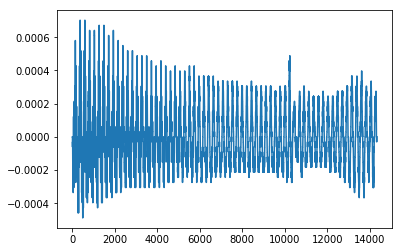

[32256, 60160, True]


[6.2764041262482279e-05, 1992.2471943168207]


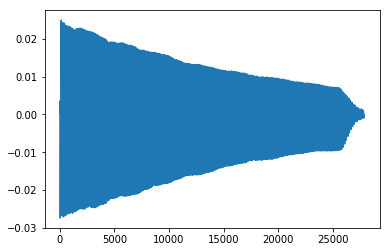

[62464, 82688, True]


[1.3923581948951831e-05, 2403.7522145640264]


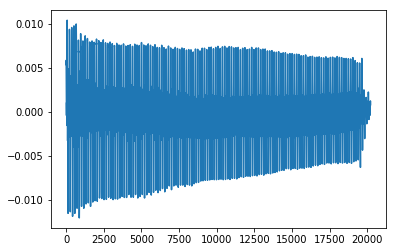

[93184, 123392, True]


[0.0001880716911311877, 1635.600702352184]


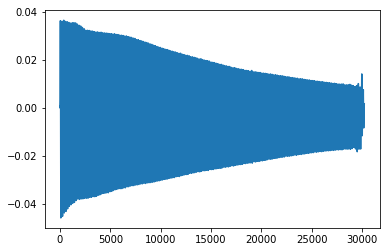

[124672, 132608, True]


[1.6165602456537947e-05, 2390.7443857206995]


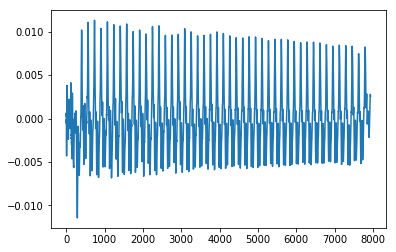

[133632, 143360, True]


[3.6222253631996481e-05, 2400.2780552029226]


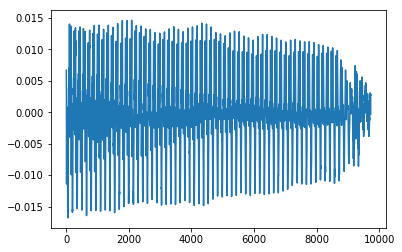

[144896, 160000, True]


[2.4055959498983317e-05, 2502.4472119335437]


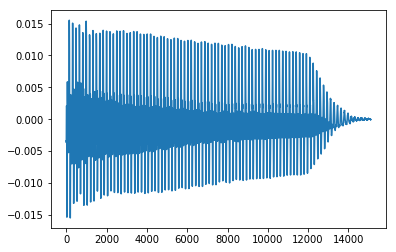

[166400, 185600, False]


[7.5491989264264709e-08, 6859.3941915880887]


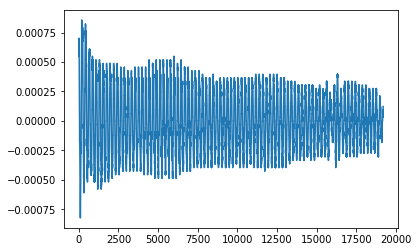

[192512, 213760, True]


[5.9770155278685309e-07, 5447.7317446458956]


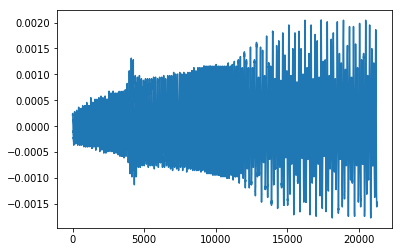

[215552, 223744, True]


[2.9177206215535989e-06, 3377.1409256387592]


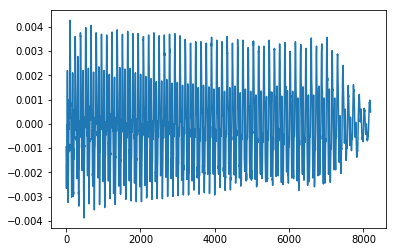

[225792, 252928, True]


[1.6391243267242077e-05, 2559.0444836673582]


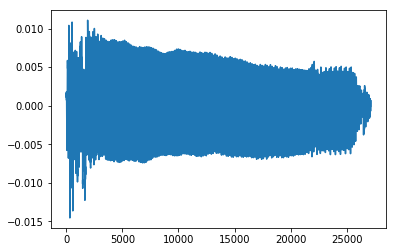

[256512, 288512, True]


[0.00019878911972045899, 1877.5597557345766]


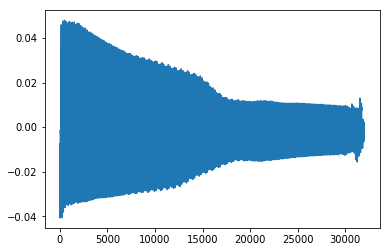

[288768, 296192, True]


[1.1139875478592926e-05, 2558.240483938474]


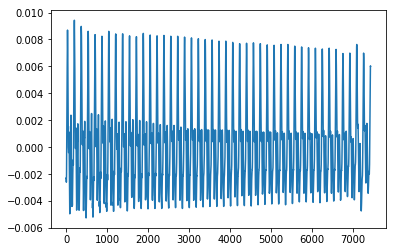

[297472, 307712, True]


[0.00019809193909168244, 1823.3304900305204]


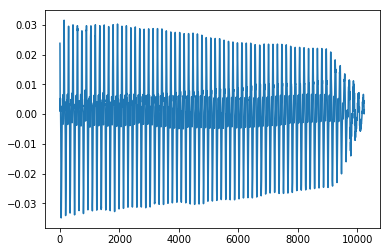

[307968, 316672, True]


[9.7674012923722751e-06, 2778.28223411727]


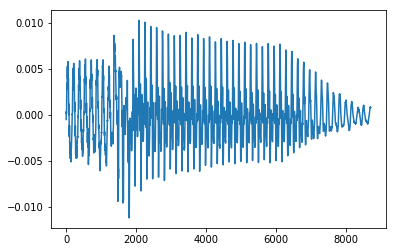

[317952, 326656, False]


[7.8757244302644667e-07, 3902.4843652080363]


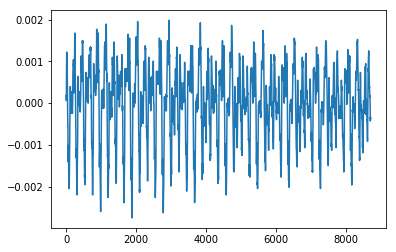

[332032, 343040, False]


[6.4654227042960568e-07, 5973.910155232832]


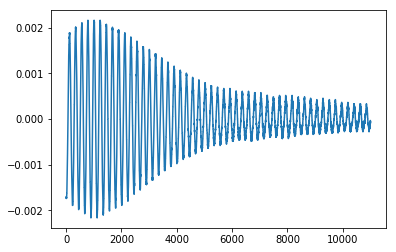

[523520, 532480, True]


[4.2681632164333549e-05, 2279.7453829757442]


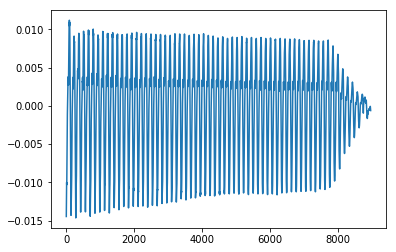

[554240, 574976, True]


[9.7063631624167342e-06, 2831.9298036705109]


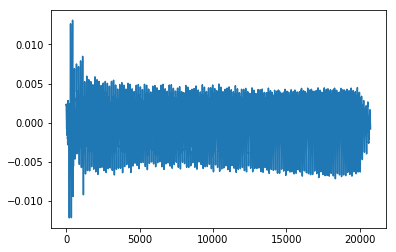

[585472, 604928, True]


[8.7019405327737331e-05, 1910.4000496237609]


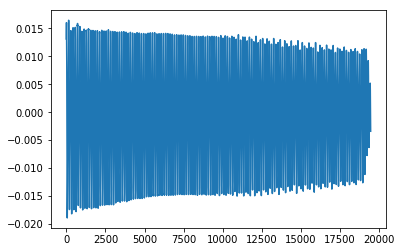

[605952, 615680, True]


[9.0625388302693243e-05, 2185.8673684414739]


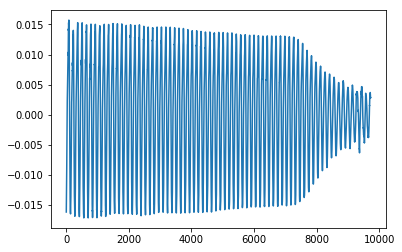

[616448, 624640, True]


[5.9237809182377532e-06, 2694.9953996346981]


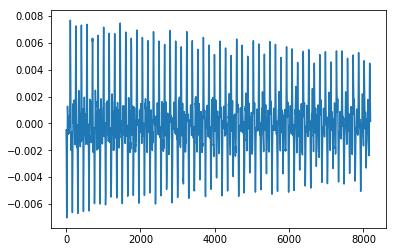

[626176, 636160, True]


[5.8159554520478617e-05, 2165.6669068061269]


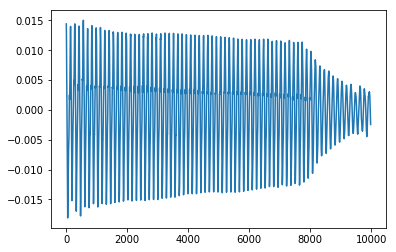

[636416, 646144, True]


[1.3006327208131552e-05, 2893.616322076216]


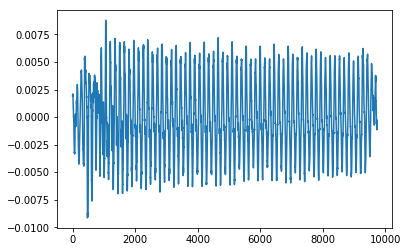

[647936, 654592, False]


[5.9330858885704606e-07, 4271.0177618928728]


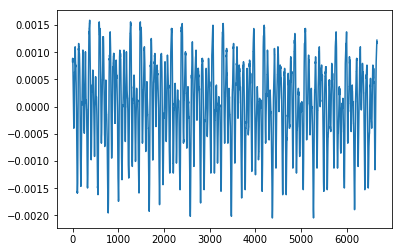

[655872, 666880, False]


[1.7504473446954994e-07, 5839.148892739071]


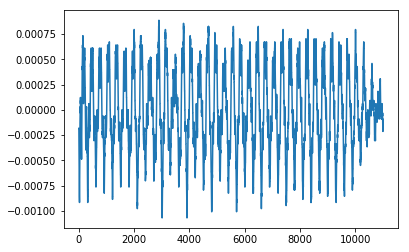

[851712, 866560, True]


[0.00031732976565073274, 2434.4305031508356]


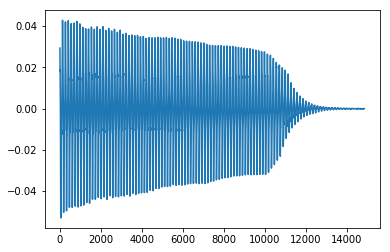

[885760, 902656, False]


[6.169413443951105e-07, 5414.9065236986517]


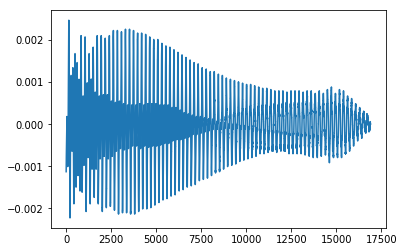

[905728, 911104, True]


[1.7044796896654936e-07, 5412.6760763213742]


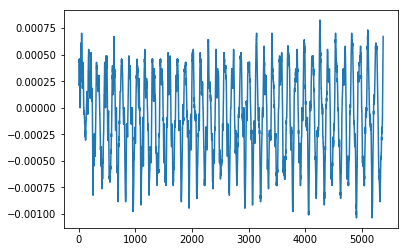

[913408, 934144, True]


[0.00012463892315640862, 1928.9520744991321]


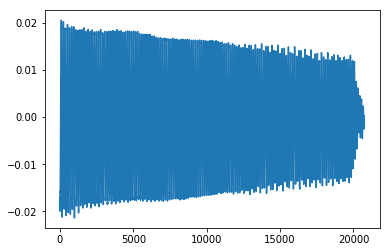

[934656, 943104, True]


[6.2324049367541168e-06, 2955.4582090951671]


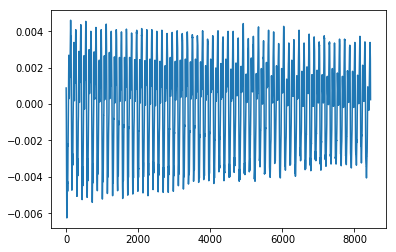

[944896, 953088, True]


[1.8361597540206276e-05, 2470.3238925190781]


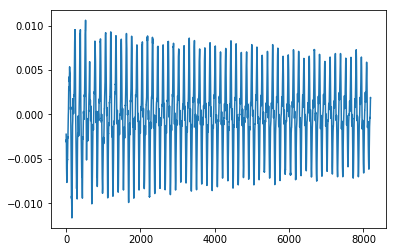

[955392, 964096, True]


[0.00018339516485438626, 2003.6296018687297]


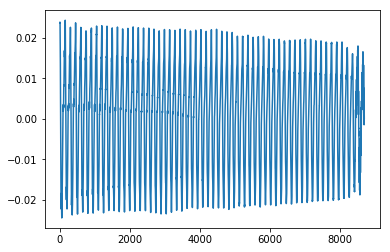

[964352, 970496, True]


[5.7418100668369665e-06, 2959.659155454327]


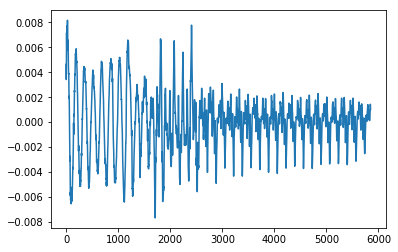

In [40]:
X_feature = []  # Features for each sample
y_label = []  # label for each sample
for note in output_notes['list']:
    hz = note['values'][0]
    midi_pitch = librosa.hz_to_midi(hz)[0]
    st = note['timestamp']
    et = st + note['duration']
    # start frame, end frame
    sf = int(round(float(st) * float(FS)))
    ef = int(round(float(et) * float(FS)))
    label = is_note(st, et, man.annotations['pitch_midi', 3])
    print([sf, ef, label])
    note_audio = np.array(y[sf:ef])
    sd.play(note_audio, FS, blocking=True)
    feature = get_note_feature(note_audio, FS)
    print(feature)
    X_feature.append(feature)
    y_label.append(label)
    plt.plot(note_audio)
    plt.show()

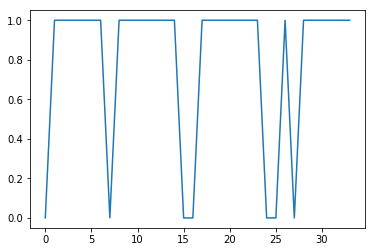

In [22]:
plt.plot(y_label)
plt.show()

In [70]:
test.max(axis=0)

array([3, 4])

In [20]:
import numpy as np
import sounddevice as sd

fs = 44100
data = np.random.uniform(-1, 1, fs) * 0.2
sd.play(data, fs)
